In [33]:
import matplotlib 
from matplotlib import font_manager, rc 

font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name() 
rc('font', family = font_name) 

# 마지막 함수가 실행이 안됩니다...ㅜ
matplotlib.rcParams['axes.Unicode_minus'] = False

KeyError: 'axes.Unicode_minus is not a valid rc parameter (see rcParams.keys() for a list of valid parameters)'

In [31]:
%matplotlib inline 
from IPython.display import display
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import mglearn 
import sklearn

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [20]:
from sklearn.datasets import make_blobs
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

print("데이터크기:", X.shape) 
print("처음5행:\n", X[:5])

# 100행 2열

데이터크기: (100, 2)
처음5행:
 [[-1.72161036 -1.48033142]
 [-3.6573384  -9.5482383 ]
 [ 7.0778163   0.99508772]
 [-1.36579859 -0.3148625 ]
 [-2.66521206 -3.12591651]]


Text(0, 0.5, '피처 1')

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


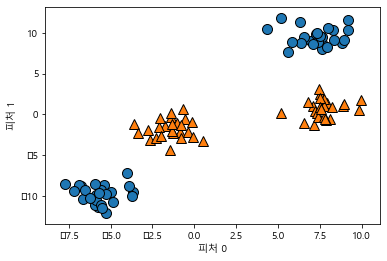

In [32]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("피처 0")
plt.ylabel("피처 1")

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0, 0.5, '피처1')

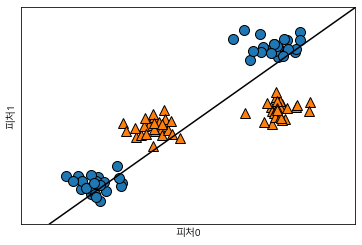

In [34]:
from sklearn.svm import LinearSVC 
linear_svm = LinearSVC( ).fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("피처0") 
plt.ylabel("피처1")

In [35]:
X_new = np.hstack([X, X[:, 1:]**2])

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


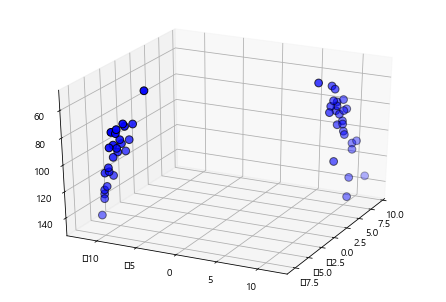

In [37]:
from mpl_toolkits.mplot3d import Axes3D, axes3d 
figure = plt.figure( ) 
ax = Axes3D(figure, elev = -152, azim = -26) 
mask = y == 0 
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],
                         c='b', cmap =mglearn.cm2, s=60, edgecolor='k')

Text(0.5, 0, '피처1**2')

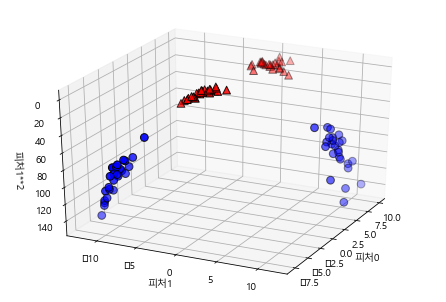

In [39]:
from mpl_toolkits.mplot3d import Axes3D, axes3d 
figure = plt.figure( ) 
ax = Axes3D(figure, elev = -152, azim = -26) 
mask = y == 0 
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],
                         c='b', cmap =mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2],
           c='r', marker = '^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("피처0") 
ax.set_ylabel("피처1") 
ax.set_zlabel("피처1**2")

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Text(0.5, 0, '피처1**2')

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


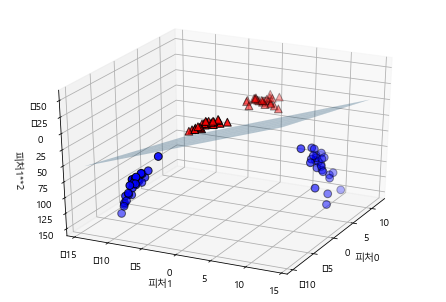

In [43]:
linear_svm_3d = LinearSVC( ).fit(X_new, y) 
coef, intercept = linear_svm_3d.coef_.ravel( ), linear_svm_3d.intercept_ 
figure = plt.figure( ) 
ax = Axes3D(figure, elev = -152, azim = -26) 
xx = np.linspace(X_new[:, 0].min( ) -2, X_new[:, 0].max( ) + 2, 50) 
yy = np.linspace(X_new[:, 1].min( ) -2, X_new[:, 1].max( ) + 2, 50)
XX, YY = np.meshgrid(xx, yy) 
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2] 
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3) 
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2],
           c='b', cmap =mglearn.cm2, s=60, edgecolor='k') 
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], 
           c='r', marker = '^', cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("피처0") 
ax.set_ylabel("피처1") 
ax.set_zlabel("피처1**2")

Text(0, 0.5, '피처1')

C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\user\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


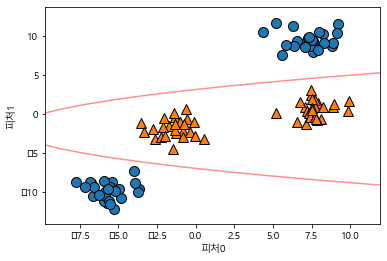

In [44]:
ZZ = YY ** 2 
dec = linear_svm_3d.decision_function(np.c_[XX.ravel( ), YY.ravel( ), ZZ.ravel( )]) 
plt.contour(XX, YY, dec.reshape(XX.shape), levels=[dec.min( ), 0, dec.max( )], 
            cmap=mglearn.cm2, alpha=0.5) 
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) 
plt.xlabel("피처0") 
plt.ylabel("피처1")

Text(0, 0.5, '피처1')

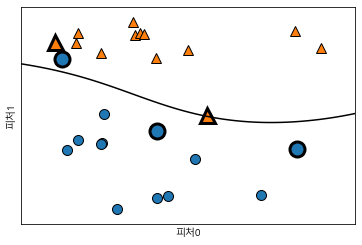

In [51]:
from sklearn.svm import SVC 
X, y = mglearn.tools.make_handcrafted_dataset( ) 
svm = SVC(kernel = 'rbf', C=10, gamma=0.1).fit(X, y)  # 매개변수 포함(C, gamma)
# gamma매개변수는 학습데이터의 표준편차와 관련 있음, 표준편차가 크면 예측이 어려워짐
# gamma 값이 크면 작은 표준편차, gamma 값이 작으면 큰 표준편차
# C 매개변수는 학습용 데이터 세트와의 관계, C값이 커지면 학습 데이터 세트에 맞추려 함(과대적합)
# C 값이 작아지면 피처가 영향을 주지 못해 예측이 안된다.

mglearn.plots.plot_2d_separator(svm, X, eps=.5)  # 결정 경계를 그리는 코드, 서포트벡터
mglearn.discrete_scatter(X[:, 0], X[:, 1], y) # 포인트로 그림, 산점도 
sv = svm.support_vectors_ # 굵은 표시가 서포트벡터임
sv_labels = svm.dual_coef_.ravel( ) > 0 
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels , s=15, markeredgewidth=3) 
plt.xlabel("피처0") 
plt.ylabel("피처1")

# 가우시안은 서포트벡터의 선이 곡선으로 유연하게 표현
# 곡선이 약간 부정확해보이는 것은 과대적합을 방지하기 위함

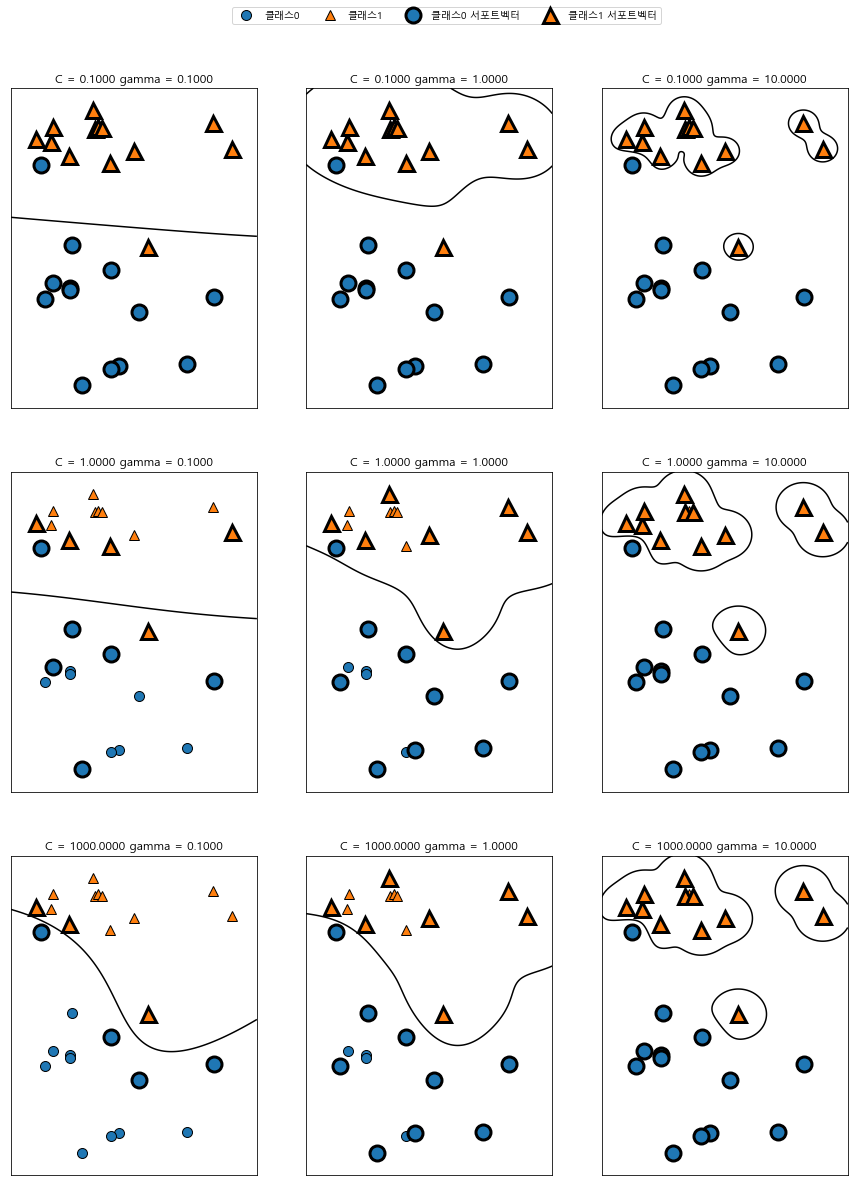

In [53]:
fig, axes = plt.subplots(3, 3, figsize=(15, 20))

for ax, C in zip(axes, [-1, 0, 3]): 
    for a, gamma in zip(ax, range(-1, 2)): 
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a) 
axes[0, 0].legend(["클래스0", "클래스1", "클래스0 서포트벡터", 
                   "클래스1 서포트벡터"], ncol=4, loc=(.9, 1.2))

# gamma값이 변해도 서포트벡터에는 변화가 없음!
# 2행 3열처럼 결정 경계가 분리가 된다면 제 역할을 하기 힘듬 :
#     경계가 분리된 부분은 학습데이터가 없어서 생긴것이라 과대적합중 하나임
# gamma가 커지면서 서포트벡터가 많아져서 모델이 이상해짐을 확인. :
#      gamma값이 모델을 복잡하게 만든다.
# C 매개변수의 증가는 결정경계를 직선에서 곡선으로 만들어준다.

# C 매개변수만 증가해도, gamma매개변수만 증가한다고 해서 꼭 모델이 좋아지는 것은 아님!

In [ ]:
서포트벡터는 데이터가 적은 경우 좋음.
데이터세트가 크면 잘 작동하지 않는다.

데이터가 적으면 아직 강력한 모델이지만 빅데이터는 약한 모델이다.
매개변수의 특징을 알고 잘 수정해 이용해야 한다.

In [58]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.datasets import make_circles 
from sklearn.model_selection import train_test_split 
X, y = make_circles(noise = 0.25, factor = 0.5, random_state =1) 

y_named = np.array(["blue", "red"])[y]

X_train, X_test, y_train_named, y_test_named, y_train,y_test = train_test_split(X, y_named, y, random_state=0) 

gbrt = GradientBoostingClassifier(random_state=0) 
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [59]:
print("X_test.shape:", X_test.shape) 
print("predict_proba값의형태:", gbrt.predict_proba(X_test).shape)

X_test.shape: (25, 2)
predict_proba값의형태: (25, 2)


In [64]:
print("predict_proba : \n", gbrt.predict_proba(X_test[:5]))

# predict_proba는 모델(알고리즘)과 매개변수의 설정에 따라 결정된다.
# SVM에 한정해서 사용하기보다 일반적인 분류(이진분류)에서 얼만큼 정확하게 분류되었는지
# 나타내는 함수여서 알고리즘에 따라 값이 달라지고, 매개변수에 따라 값이 달라진다.

predict_proba : 
 [[0.01573626 0.98426374]
 [0.84575649 0.15424351]
 [0.98112869 0.01887131]
 [0.97406775 0.02593225]
 [0.01352142 0.98647858]]


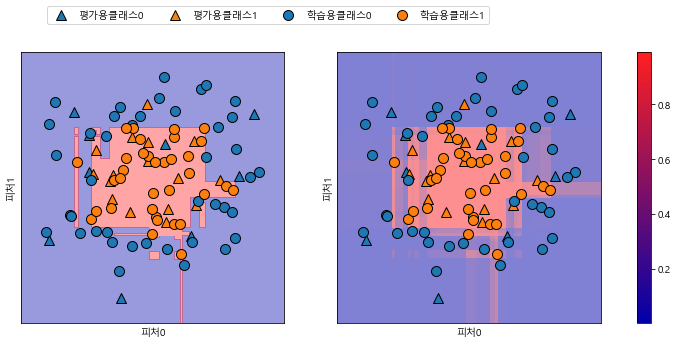

In [65]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5)) 
mglearn.tools.plot_2d_separator( gbrt, X, ax=axes[0], alpha=.4, fill=True, 
                                cm=mglearn.cm2) 
scores_image = mglearn.tools.plot_2d_scores( gbrt, X, ax=axes[1], alpha=.5, 
                                            cm=mglearn.ReBl, function='predict_proba') 
for ax in axes: 
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test, 
                             markers='^', ax=ax) 
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, 
                             markers='o', ax=ax) 
    ax.set_xlabel("피처0") 
    ax.set_ylabel("피처1")

cbar = plt.colorbar(scores_image, ax=axes.tolist( )) 
cbar.set_alpha(1) 
cbar.draw_all( ) 
axes[0].legend(["평가용클래스0", "평가용클래스1", "학습용클래스0", "학습용클래스1"], 
               ncol=4, loc=(.1, 1.1))